In [37]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, metrics

import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox
from PIL import Image
from tqdm import tqdm
import os
import math

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,mean_absolute_error
def MAPE(y_test, y_pred):
    # print(y_test.shape, y_pred.shape)
    y_t=y_test.flatten()
    y_p=y_pred.flatten()
    all=set(zip(y_t,y_p))
    print(len(all))
    cnt=0
    cost=0
    for t,p in all:#t로나눠
        if t==0:
            # c=np.abs(t-p) / p
            continue
        else:
            c=np.abs(t-p) / t
            cnt+=1
            
            cost+=c
            # if c>30:
            #     print("값",t,p)
            #     print(c,cost,cnt)

    return cost/cnt*100

# test all 2020

In [40]:


path="D:/npz_gray_7"

models=[]
# models.append(keras.models.load_model('my_model_test_100_binary_crossentropy_0.001.h5'))
models.append(keras.models.load_model('my_model_mse_1026_gray_batch16_win7.h5'))
# my_model_mse_1103_gray_batch16_win7_fil16
models.append(keras.models.load_model('my_model_mse_1103_gray_batch16_win7_fil16.h5'))

models.append(keras.models.load_model('my_model_mse_1103_gray_batch16_win7_fil16_deep.h5'))
# models.append(keras.models.load_model('my_model_mse_1103_gray_batch16_win7_fil3_add_0.001.h5'))



In [45]:



path="D:/npz_gray_7_inverse"

models=[]

models.append(keras.models.load_model('my_model_mse_fil16_inverse.h5'))
models.append(keras.models.load_model('my_model_mse_fil16_inverse_mape.h5'))
models.append(keras.models.load_model('my_model_mse_fil16_inverse_mape_0.002_원래는0.004.h5'))



In [194]:
# # 2020년 (훈련안시킨거) 모든거 예측하고 매트릭 확인
# total=[]
# for k in range(1):
#     mse_list=[]
#     mape_list=[]
#     mae_list=[]
#     for i in tqdm(list[:3]):
#         x_test = np.load(f"{path}/2020/{i}")['x']
#         for target in range(8):
#             for idx in range(7):
#                 a=np.expand_dims(x_test[target+idx],axis=0)
#                 prd=models[1].predict(a)
#                 aa=[]
#                 for b in prd[0][-1]:
#                     bb=[]
#                     for c in b:
                    
#                         bb.append([c,c,c])
#                     aa.append(bb)
#                 aa=np.array(aa)[:,:,:,0]
            
#                 if idx==0:
#                     predict=np.expand_dims(aa,axis=0)
#                 else:
#                     predict = np.concatenate((predict, np.expand_dims(aa,axis=0)), axis=0)
#             original=x_test[target+5]
#             all=[]
#             for a in original:
#                 aa=[]
#                 for b in a:
#                     bb=[]
#                     for c in b:
#                         bb.append([c,c,c])
#                     aa.append(bb)
#                 all.append(aa)
#             original=np.array(all)[:,:,:,:,0]

#             mse=mean_squared_error(original.reshape(7,302 *176* 3),predict.reshape(7,302 *176* 3))
#             mape=MAPE(original,predict)
#             mae=mean_absolute_error(original.reshape(7,302 *176* 3),predict.reshape(7,302 *176*3 ))
#             mse_list.append(mse)
#             mape_list.append(mape)
#             mae_list.append(mae)
#     #모델의 총 메트릭
#     mse=sum(mse_list)/len(mse_list)
#     mape=sum(mape_list)/len(mape_list)
#     mae=sum(mae_list)/len(mae_list)
#     total.append([mse,mape,mae])

100%|██████████| 3/3 [02:46<00:00, 55.36s/it]


In [3]:
def show(x_test,target,idx,model):
    a=np.expand_dims(x_test[target+idx], axis=0)
    prd=model.predict(a)
    aa=[]
    for b in prd[0][-1]:
        bb=[]
        for c in b:
            bb.append([c,c,c])
        aa.append(bb)
    aa=np.array(aa)[:,:,:,0]
    if idx==0:
        predict=np.expand_dims(aa,axis=0)
    else:
        predict = np.concatenate((predict, np.expand_dims(aa,axis=0)), axis=0)

(7, 302, 176) (7, 302, 176, 3)
27500
mse : 0.013040269834064278 , mape : 43.30069189193031 , mae : 0.06892252307130413
(7, 302, 176) (7, 302, 176, 3)
27515
mse : 0.0170381669912554 , mape : 21.766551005299277 , mae : 0.06529052567407288
(7, 302, 176) (7, 302, 176, 3)
27518
mse : 0.018695208345092362 , mape : 21.6984573353863 , mae : 0.06719309143180123


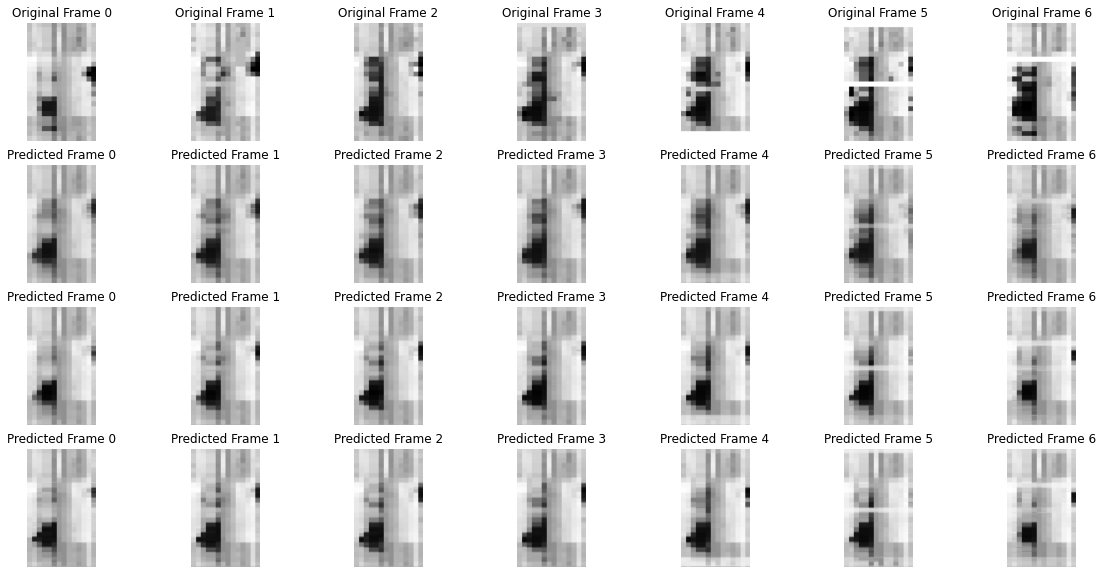

In [48]:
# 모든 모델 훈련시킨걸로 확인하기
x_test = np.load(f"{path}/batch/x/4.npz")['x']
target=7 # 
originals=[]
predicts=[]

model_num=3

for i in range(model_num):
    for idx in range(7):
        a=np.expand_dims(x_test[target+idx], axis=0)
        prd=models[i].predict(a)
        aa=[]
        for b in prd[0][-1]:
            bb=[]
            for c in b:
                
                bb.append([c,c,c])
            aa.append(bb)
        aa=np.array(aa)[:,:,:,0]
    
        if idx==0:
            predict=np.expand_dims(aa,axis=0)
        else:
            predict = np.concatenate((predict, np.expand_dims(aa,axis=0)), axis=0)
    original=x_test[target+6]
    all=[]
    for a in original:
        aa=[]
        for b in a:
            bb=[]
            for c in b:
                bb.append([c,c,c])
            aa.append(bb)
        all.append(aa)
    original=np.array(all)[:,:,:,:,0]
    print(original[:,:,:,0].shape,predict.shape)
    mse=mean_squared_error(original[:,:,:,0].reshape(7,302 *176* 1),predict[:,:,:,0].reshape(7,302 *176* 1))
    mape=MAPE(original[:,:,:,0],predict[:,:,:,0])
    mae=mean_absolute_error(original[:,:,:,0].reshape(7,302 *176* 1),predict[:,:,:,0].reshape(7,302 *176*1 ))
    print(f"mse : {mse} , mape : {mape} , mae : {mae}")
    #모든 모델 확인하기 위해 리스트에 저장
    originals.append(original)
    predicts.append(predict)


fig, axes = plt.subplots(model_num+1, 7, figsize=(20, 10))

# Plot the original frames.
for idx, ax in enumerate(axes[0]):
    ax.imshow(1-(original[idx]))
    ax.set_title(f"Original Frame {idx}")
    ax.axis("off")

for i in range(model_num):
    for idx, ax in enumerate(axes[i+1]):
        ax.imshow(1-predicts[i][idx])
        ax.set_title(f"Predicted Frame {idx}")
        ax.axis("off")



(7, 302, 176, 3) (7, 302, 176, 3)
27492
mse : 0.011601411396779211 , mape : 34.91940977394463 , mae : 0.06364604903124095
(7, 302, 176, 3) (7, 302, 176, 3)
27506
mse : 0.015981803622065572 , mape : 19.34739568209447 , mae : 0.061494906775959715
(7, 302, 176, 3) (7, 302, 176, 3)
27515
mse : 0.01739286820254626 , mape : 19.105462938753814 , mae : 0.06321872328295475


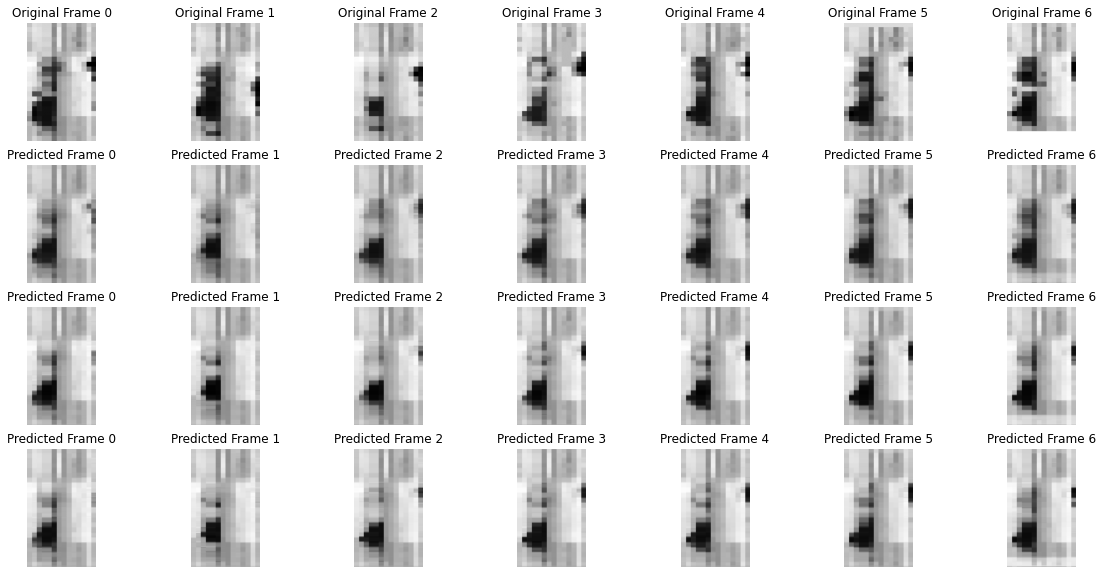

In [49]:
# 모든 모델 새로운데이터로 확인하기
x_test = np.load(f"{path}/2020/3.npz")['x']
target=6 # 
originals=[]
predicts=[]
model_num=3
for i in range(model_num):
    for idx in range(7):
        a=np.expand_dims(x_test[target+idx], axis=0)
        prd=models[i].predict(a)
        aa=[]
        for b in prd[0][-1]:
            bb=[]
            for c in b:
                
                bb.append([c,c,c])
            aa.append(bb)
        aa=np.array(aa)[:,:,:,0]
    
        if idx==0:
            predict=np.expand_dims(aa,axis=0)
        else:
            predict = np.concatenate((predict, np.expand_dims(aa,axis=0)), axis=0)
    original=x_test[target+6]
    all=[]
    for a in original:
        aa=[]
        for b in a:
            bb=[]
            for c in b:
                bb.append([c,c,c])
            aa.append(bb)
        all.append(aa)
    original=np.array(all)[:,:,:,:,0]
    print(original.shape,predict.shape)
    mse=mean_squared_error(original.reshape(7,302 *176* 3),predict.reshape(7,302 *176* 3))
    mape=MAPE(original,predict)
    mae=mean_absolute_error(original.reshape(7,302 *176* 3),predict.reshape(7,302 *176*3 ))
    print(f"mse : {mse} , mape : {mape} , mae : {mae}")
    #모든 모델 확인하기 위해 리스트에 저장
    originals.append(original)
    predicts.append(predict)

fig, axes = plt.subplots(model_num+1, 7, figsize=(20, 10))

# Plot the original frames.
for idx, ax in enumerate(axes[0]):
    ax.imshow(1-original[idx])
    ax.set_title(f"Original Frame {idx}")
    ax.axis("off")

for i in range(model_num):
    for idx, ax in enumerate(axes[i+1]):
        ax.imshow(1-predicts[i][idx])
        ax.set_title(f"Predicted Frame {idx}")
        ax.axis("off")


In [148]:
def compute_metrics(original,predict,s,e):
    t=12.58
    start=round(t * s)
    end=round(t*e)
    y=original[:,start:end,:,:]
    y_pred=predict[:,start:end,:,:]
    
    # mape=MAPE(y.reshape(-1,),y_pred.reshape(-1,))
    mape=MAPE(y,y_pred)
    y=(y+1)*60
    y_pred=(y_pred+1)*60

    mse=mean_squared_error(y.flatten(),y_pred.flatten())
    mae=mean_absolute_error(y.flatten(),y_pred.flatten())
    return np.array([mse,mape,mae])

In [195]:
# 2020년 (훈련안시킨거) 모든거 예측하고 매트릭 확인

total=[]
for k in range(1):
    before_list=[]
    after_list=[]
    peak_list=[]
    rest_list=[]
    # for i in tqdm(list):
    x_test = np.load(f"{path}/2020/4.npz")['x']
    for target in range(8):
        for idx in range(7):
            a=np.expand_dims(x_test[target+idx],axis=0)
            prd=models[1].predict(a)
        
            aa=[]
            for b in prd[0][-1]:
                bb=[]
                for c in b:
                    
                    bb.append([c,c,c])
                aa.append(bb)
            aa=np.array(aa)[:,:,:,0]
            if idx==0:
                predict=np.expand_dims(aa,axis=0)
            else:
                predict = np.concatenate((predict, np.expand_dims(aa,axis=0)), axis=0)
        original=x_test[target+5]
        all=[]
        for a in original:
            aa=[]
            for b in a:
                bb=[]
                for c in b:
                    bb.append([c,c,c])
                aa.append(bb)
            all.append(aa)
        
        original=np.array(all)
        # print(original.shape,predict.shape)

        #before peak hour - 7~12
        before=compute_metrics(original,predict,7,12)
        #peak 12~19
        peak=compute_metrics(original,predict,12,19)
        #after 19~21
        after=compute_metrics(original,predict,19,21)
        #rest 22~24 , 0~6
        t=12.58
        start=round(t * 21)
        end=round(t*24)
        y=original[:,start:end,:,:]
        y_pred=predict[:,start:end,:,:]
        start=round(t * 0)
        end=round(t*7)
        # 22~24 0~6 시간대 합치기
        y=np.concatenate((y,original[:,start:end,:,:]),axis=1)
        y_pred=np.concatenate((y_pred,predict[:,start:end,:,:]),axis=1)
        
        mape=MAPE(y,y_pred)
        y=(y+1)*60
        y_pred=(y_pred+1)*60

        mse=mean_squared_error(y.flatten(),y_pred.flatten())
        mae=mean_absolute_error(y.flatten(),y_pred.flatten())
        
        rest=[mse,mape,mae]
        
        before_list.append(before)
        after_list.append(after)
        peak_list.append(peak)
        rest_list.append(rest)


    total.append(np.array((np.array(before_list),np.array(peak_list),np.array(after_list),np.array(rest_list))))
total=np.array(total)

In [196]:
# mse,mape,mae
print("before")
print(np.mean(total[0][0],axis=0))
print("peak")
print(np.mean(total[0][1],axis=0))
print("after")
print(np.mean(total[0][2],axis=0))
print("rest")
print(np.mean(total[0][3],axis=0))
print("표준편차")
print("before")
print(np.std(total[0][0],axis=0))
print("peak")
print(np.std(total[0][1],axis=0))
print("after")
print(np.std(total[0][2],axis=0))
print("rest")
print(np.std(total[0][3],axis=0))

before
[88.02205224 53.09559514  6.24326159]
peak
[53.13094357 44.16922338  4.74803171]
after
[56.52655777 46.19497314  5.12051787]
rest
[46.05930151 15.22416647  4.54109405]
표준편차
before
[4.52019861 4.35313177 0.15513846]
peak
[8.47684305 6.20462757 0.41080686]
after
[16.31194303 16.58825747  0.95516045]
rest
[19.51240555  3.56379537  1.10173766]


In [189]:
# 2020년 (훈련안시킨거) 모든거 예측하고 매트릭 확인

total2=[]
for k in range(1):
    before_list=[]
    after_list=[]
    peak_list=[]
    rest_list=[]
    # for i in tqdm(list):
    x_test = np.load(f"{path}/2020/2.npz")['x']
    for target in range(9):
        for idx in range(6):
            a=np.expand_dims(x_test[target+idx],axis=0)
            prd=models[0].predict(a)
        
            aa=[]
            for b in prd[0][-1]:
                bb=[]
                for c in b:
                    
                    bb.append([c,c,c])
                aa.append(bb)
            aa=np.array(aa)[:,:,:,0]
            if idx==0:
                predict=np.expand_dims(aa,axis=0)
            else:
                predict = np.concatenate((predict, np.expand_dims(aa,axis=0)), axis=0)
        original=x_test[target+5]
        all=[]
        for a in original:
            aa=[]
            for b in a:
                bb=[]
                for c in b:
                    bb.append([c,c,c])
                aa.append(bb)
            all.append(aa)
        
        original=np.array(all)
        # print(original.shape,predict.shape)

        #before peak hour - 7~12
        before=compute_metrics(original,predict,7,12)
        #peak 12~19
        peak=compute_metrics(original,predict,12,19)
        #after 19~21
        after=compute_metrics(original,predict,19,21)
        #rest 22~24 , 0~6
        t=12.58
        start=round(t * 21)
        end=round(t*24)
        y=original[:,start:end,:,:]
        y_pred=predict[:,start:end,:,:]
        start=round(t * 0)
        end=round(t*7)
        # 22~24 0~6 시간대 합치기
        y=np.concatenate((y,original[:,start:end,:,:]),axis=1)
        y_pred=np.concatenate((y_pred,predict[:,start:end,:,:]),axis=1)
        
        mape=MAPE(y,y_pred)
        y=(y+1)*60
        y_pred=(y_pred+1)*60

        mse=mean_squared_error(y.flatten(),y_pred.flatten())
        mae=mean_absolute_error(y.flatten(),y_pred.flatten())
        
        rest=[mse,mape,mae]
        
        before_list.append(before)
        after_list.append(after)
        peak_list.append(peak)
        rest_list.append(rest)


    total.append(np.array((np.array(before_list),np.array(peak_list),np.array(after_list),np.array(rest_list))))
total2=np.array(total)

ValueError: Found input variables with inconsistent numbers of samples: [232848, 199584]

In [ ]:
# mse,mape,mae
print("before")
print(np.mean(total2[0][0],axis=0))
print("peak")
print(np.mean(total2[0][1],axis=0))
print("after")
print(np.mean(total2[0][2],axis=0))
print("rest")
print(np.mean(total2[0][3],axis=0))
print("표준편차")
print("before")
print(np.std(total2[0][0],axis=0))
print("peak")
print(np.std(total2[0][1],axis=0))
print("after")
print(np.std(total2[0][2],axis=0))
print("rest")
print(np.std(total2[0][3],axis=0))

In [ ]:
# # 2020년 (훈련안시킨거) 모든거 예측하고 매트릭 확인

# total=[]
# for k in range(2):
#     before_list=[]
#     after_list=[]
#     peak_list=[]
#     rest_list=[]
#     # for i in tqdm(list):
#     x_test = np.load(f"{path}/2020/2.npz")['x']
#     for target in range(18):
#         for idx in range(6):
#             a=np.expand_dims(x_test[target+idx],axis=0)
#             prd=models[k].predict(a)
#             if idx==0:
#                 predict=np.expand_dims(prd[0][-1],axis=0)
#             else:
#                 predict=np.concatenate((predict,np.expand_dims(prd[0][-1],axis=0)),axis=0)
#         original=x_test[target+5]
#         #before peak hour - 7~12
#         before=compute_metrics(7,12)
#         #peak 12~19
#         peak=compute_metrics(12,19)
#         #after 19~21
#         after=compute_metrics(19,21)
#         #rest 22~24 , 0~6
#         t=12.58
#         start=round(t * 21)
#         end=round(t*24)
#         y=original[:,start:end,:,:]
#         y_pred=predict[:,start:end,:,:]
#         start=round(t * 0)
#         end=round(t*7)
#         # 22~24 0~6 시간대 합치기
#         y=np.concatenate((y,original[:,start:end,:,:]),axis=1)
#         y_pred=np.concatenate((y_pred,predict[:,start:end,:,:]),axis=1)
        
#         mse=mean_squared_error(y.reshape(6,y.shape[1]*176* 3),y_pred.reshape(6,y.shape[1] *176* 3))
#         mape=MAPE((y*255+1),(y_pred*255+1))
        
#         mae=mean_absolute_error(y.reshape(6,y.shape[1]*176* 3),y_pred.reshape(6,y.shape[1] *176* 3))
        
#         rest=[mse,mape,mae]
        
#         before_list.append(before)
#         after_list.append(after)
#         peak_list.append(peak)
#         rest_list.append(rest)


#     total.append(np.array((np.array(before_list),np.array(peak_list),np.array(after_list),np.array(rest_list))))
# total=np.array(total)

In [152]:
# mse,mape,mae
print("before")
print(np.mean(total[0][0],axis=0))
print("peak")
print(np.mean(total[0][1],axis=0))
print("after")
print(np.mean(total[0][2],axis=0))
print("rest")
print(np.mean(total[0][3],axis=0))
print("표준편차")
print("before")
print(np.std(total[0][0],axis=0))
print("peak")
print(np.std(total[0][1],axis=0))
print("after")
print(np.std(total[0][2],axis=0))
print("rest")
print(np.std(total[0][3],axis=0))

before
[30.09655889 30.41768951  4.20539981]
peak
[37.12391396 40.70233267  4.71663537]
after
[53.34358836 58.21013672  5.59674044]
rest
[24.09878969 12.29736551  3.89083012]
표준편차
before
[2.39452783 7.41034072 0.25136129]
peak
[3.20528185 8.51993725 0.20975115]
after
[ 6.59026685 11.01835599  0.42641541]
rest
[4.56067598 2.99438791 0.32004584]


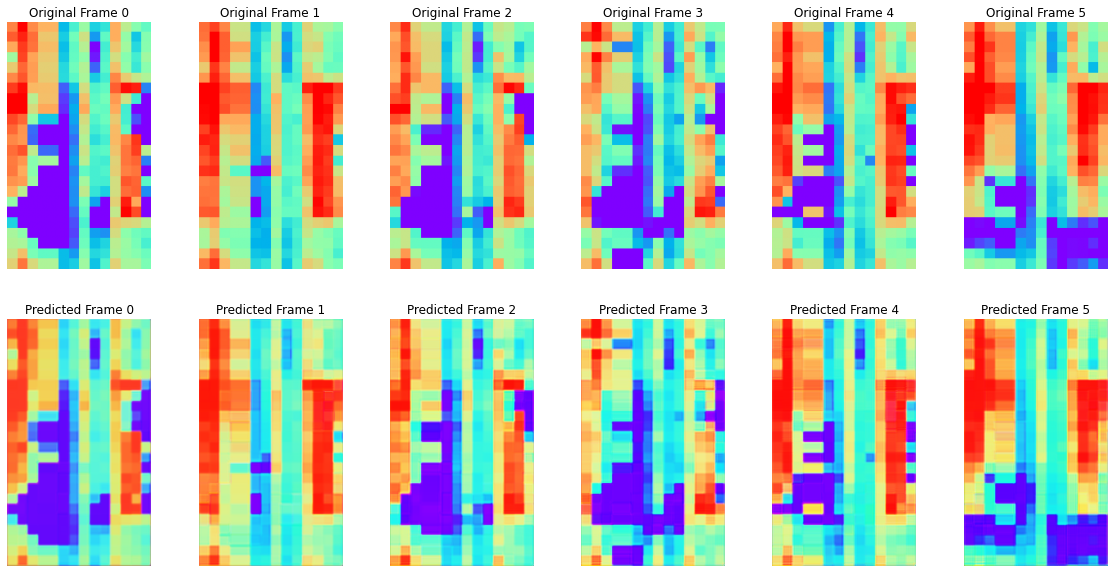

In [27]:
# 그냥 1개넣어서 한프레임 뒤에 예측

xx=np.expand_dims(x_test[5], axis=0)
y_test=np.expand_dims(x_test[5], axis=0)



predict = model.predict(xx)

fig, axes = plt.subplots(2, 6, figsize=(20, 10))

# Plot the original frames.
for idx, ax in enumerate(axes[0]):
    ax.imshow(y_test[0][idx])
    ax.set_title(f"Original Frame {idx}")
    ax.axis("off")



for idx, ax in enumerate(axes[1]):
    ax.imshow(predict[0][idx])
    ax.set_title(f"Predicted Frame {idx}")
    ax.axis("off")

In [21]:
fpath = keras.utils.get_file(
    "moving_mnist.npy",
    "http://www.cs.toronto.edu/~nitish/unsupervised_video/mnist_test_seq.npy",
)
dataset = np.load(fpath)

# Swap the axes representing the number of frames and number of data samples.
dataset = np.swapaxes(dataset, 0, 1)
# We'll pick out 1000 of the 10000 total examples and use those.
dataset = dataset[:1000, ...]
# Add a channel dimension since the images are grayscale.
dataset = np.expand_dims(dataset, axis=-1)

# Split into train and validation sets using indexing to optimize memory.
indexes = np.arange(dataset.shape[0])
np.random.shuffle(indexes)
train_index = indexes[: int(0.9 * dataset.shape[0])]
val_index = indexes[int(0.9 * dataset.shape[0]) :]
train_dataset = dataset[train_index]
val_dataset = dataset[val_index]

# Normalize the data to the 0-1 range.
train_dataset = train_dataset / 255
val_dataset = val_dataset / 255

# We'll define a helper function to shift the frames, where
# `x` is frames 0 to n - 1, and `y` is frames 1 to n.
def create_shifted_frames(data):
    x = data[:, 0 : data.shape[1] - 1, :, :]
    y = data[:, 1 : data.shape[1], :, :]
    return x, y


# Apply the processing function to the datasets.
x_train, y_train = create_shifted_frames(train_dataset)
x_val, y_val = create_shifted_frames(val_dataset)

# Inspect the dataset.
print("Training Dataset Shapes: " + str(x_train.shape) + ", " + str(y_train.shape))
print("Validation Dataset Shapes: " + str(x_val.shape) + ", " + str(y_val.shape))


819208192/819200096 [==============================] - 218s 0us/step
Training Dataset Shapes: (900, 19, 64, 64, 1), (900, 19, 64, 64, 1)
Validation Dataset Shapes: (100, 19, 64, 64, 1), (100, 19, 64, 64, 1)


Displaying frames for example 517.


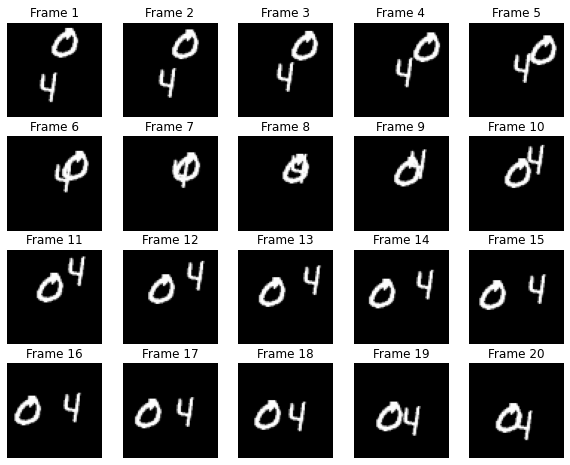

In [23]:
fig, axes = plt.subplots(4, 5, figsize=(10, 8))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(train_dataset)), size=1)[0]
for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(train_dataset[data_choice][idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {data_choice}.")
plt.show()